In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### How many unique players are there in the dataset?

In [124]:
all_data = pd.read_csv("Yearly_Player_Statistics_Data\Combined_Data\All_Seasons_Data.csv")
all_data.head()

,Unnamed: 0,slug,name,positions,age,team,games_played,games_started,minutes_played,made_field_goals,...,attempted_free_throws,offensive_rebounds,defensive_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,season
0,0,abdulma02,Mahmoud Abdul-Rauf,POINT GUARD,31,VANCOUVER GRIZZLIES,41,0,486,120,...,29,5,20,76,9,1,26,50,266,2001
1,1,abdulta01,Tariq Abdul-Wahad,SHOOTING GUARD,26,DENVER NUGGETS,29,12,420,43,...,36,14,45,22,14,13,34,54,111,2001
2,2,abdursh01,Shareef Abdur-Rahim,SMALL FORWARD,24,VANCOUVER GRIZZLIES,81,81,3241,604,...,531,175,560,250,90,77,231,238,1663,2001
3,3,alexaco01,Cory Alexander,POINT GUARD,27,ORLANDO MAGIC,26,0,227,18,...,18,0,25,36,16,0,25,29,52,2001
4,4,alexaco02,Courtney Alexander,POINT GUARD,23,DALLAS MAVERICKS,38,6,472,62,...,45,20,43,21,16,3,21,76,160,2001


In [125]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10603 entries, 0 to 10602
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Unnamed: 0                         10603 non-null  int64 
 1   slug                               10603 non-null  object
 2   name                               10603 non-null  object
 3   positions                          10603 non-null  object
 4   age                                10603 non-null  int64 
 5   team                               10603 non-null  object
 6   games_played                       10603 non-null  int64 
 7   games_started                      10603 non-null  int64 
 8   minutes_played                     10603 non-null  int64 
 9   made_field_goals                   10603 non-null  int64 
 10  attempted_field_goals              10603 non-null  int64 
 11  made_three_point_field_goals       10603 non-null  int64 
 12  atte

In [126]:
all_data['slug'].nunique()

1971

In [127]:
three_point_totals = all_data.groupby("season")['attempted_three_point_field_goals'].sum()
three_point_totals

season
2001    32597
2002    35074
2003    34912
2004    35492
2005    38748
2006    39313
2007    41672
2008    44544
2009    44583
2010    44622
2011    44313
2012    36395
2013    49067
2014    52974
2015    55137
2016    59242
2017    66422
2018    71340
2019    78742
2020    72252
Name: attempted_three_point_field_goals, dtype: int64

In [128]:
x = all_data['season'].unique()
y = three_point_totals

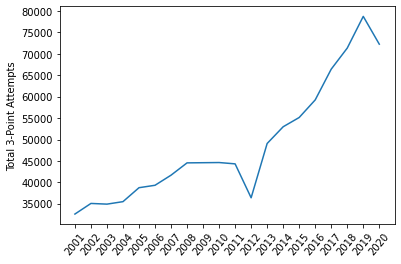

In [129]:
plt.xticks(np.arange(min(x),max(x)+1,1),rotation=50)
plt.yticks(np.arange(min(y)+2403,max(y)+2000,5000))
plt.ylabel('Total 3-Point Attempts')
plt.plot(y)

## What is the breakdown of 3-point shot attempts by position per year?

In [130]:
all_data.groupby(['season','positions']).attempted_three_point_field_goals.sum()

season  positions     
2001    CENTER              354
        POINT GUARD       10073
        POWER FORWARD      3879
        SHOOTING GUARD     9937
        SMALL FORWARD      8354
                          ...  
2020    CENTER             6523
        POINT GUARD       15260
        POWER FORWARD     15063
        SHOOTING GUARD    22024
        SMALL FORWARD     13382
Name: attempted_three_point_field_goals, Length: 100, dtype: int64

### Need to assign a series for each position for a clustered bar chart grouped by season

In [131]:
center = all_data[all_data['positions'] == "CENTER"].groupby(['season'])['attempted_three_point_field_goals'].sum()
point_guard = all_data[all_data['positions'] == "POINT GUARD"].groupby(['season'])['attempted_three_point_field_goals'].sum()
power_forward = all_data[all_data['positions'] == "POWER FORWARD"].groupby(['season'])['attempted_three_point_field_goals'].sum()
shooting_guard = all_data[all_data['positions'] == "SHOOTING GUARD"].groupby(['season'])['attempted_three_point_field_goals'].sum()
small_forward = all_data[all_data['positions'] == "SMALL FORWARD"].groupby(['season'])['attempted_three_point_field_goals'].sum()

### Plot Code

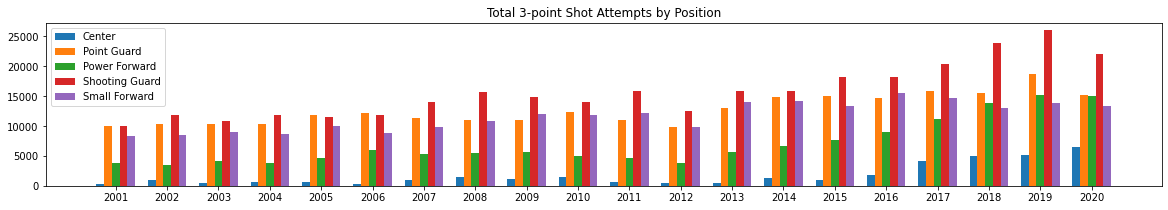

In [147]:
width = 0.15
x = center.index

bar_c = np.arange(len(x))
bar_pg = [i+width for i in bar_c]
bar_pf = [i+width for i in bar_pg]
bar_sg = [i+width for i in bar_pf]
bar_sf = [i+width for i in bar_sg]

plt.figure(figsize=(20, 3))
plt.bar(bar_c, center.values, width,  label='Center')
plt.bar(bar_pg, point_guard.values, width,  label='Point Guard')
plt.bar(bar_pf, power_forward.values, width, label='Power Forward')
plt.bar(bar_sg, shooting_guard.values, width, label='Shooting Guard')
plt.bar(bar_sf, small_forward.values, width, label='Small Forward')

plt.xticks(bar_c+ width*2 ,x)
plt.title('Total 3-point Shot Attempts by Position')
plt.legend()
plt.show()

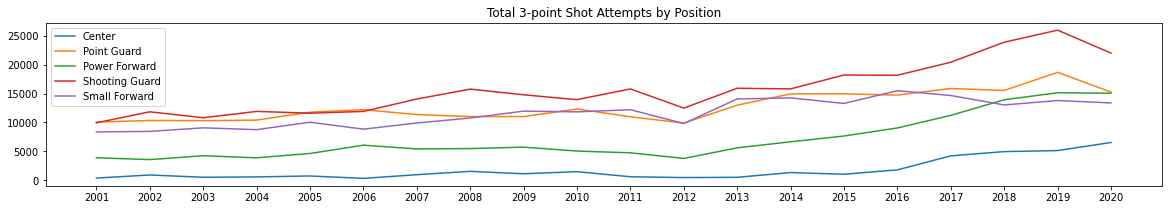

In [150]:
plt.figure(figsize=(20, 3))

line_x = np.arange(len(center.index))
plt.plot(line_x, center.values,label='Center')
plt.plot(line_x, point_guard.values,label='Point Guard')
plt.plot(line_x, power_forward.values,label='Power Forward')
plt.plot(line_x, shooting_guard.values,label='Shooting Guard')
plt.plot(line_x, small_forward.values,label='Small Forward')

plt.xticks(line_x,x)
plt.title('Total 3-point Shot Attempts by Position')
plt.legend()
plt.show()